In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [4]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [6]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [8]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [9]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [11]:
df_duplicate=df_train.duplicated()
print(f'{df_train[df_duplicate].shape[0]} duplicates')

307 duplicates


In [12]:
df_train=df_train.drop_duplicates()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386496 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386496 non-null  object 
 1   additional_number_of_scoring                386496 non-null  int64  
 2   review_date                                 386496 non-null  object 
 3   average_score                               386496 non-null  float64
 4   hotel_name                                  386496 non-null  object 
 5   reviewer_nationality                        386496 non-null  object 
 6   negative_review                             386496 non-null  object 
 7   review_total_negative_word_counts           386496 non-null  int64  
 8   total_number_of_reviews                     386496 non-null  int64  
 9   positive_review                             386496 non-null  object 
 

In [13]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

### Очистка от пропущенных значений

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515431 non-null  object 
 1   additional_number_of_scoring                515431 non-null  int64  
 2   review_date                                 515431 non-null  object 
 3   average_score                               515431 non-null  float64
 4   hotel_name                                  515431 non-null  object 
 5   reviewer_nationality                        515431 non-null  object 
 6   negative_review                             515431 non-null  object 
 7   review_total_negative_word_counts           515431 non-null  int64  
 8   total_number_of_reviews                     515431 non-null  int64  
 9   positive_review                             515431 non-null  object 
 

In [15]:
for col in data.columns:
    if data[col].isna().sum()>0:
        num=data[col].isna().sum()
        print(f'{col}: {num} NA values')

lat: 3268 NA values
lng: 3268 NA values


In [16]:
nan_data = data[data['lat'].isna()].groupby(['hotel_name', 'hotel_address'], as_index=False)[['lat', 'lng']].count()
nan_data[['lat', 'lng']]=nan_data[['lat', 'lng']].replace(0, np.nan)
nan_data

,hotel_name,hotel_address,lat,lng
0,Austria Trend Hotel Schloss Wilhelminenberg Wien,Savoyenstra e 2 16 Ottakring 1160 Vienna Austria,NaN,NaN
1,City Hotel Deutschmeister,Gr nentorgasse 30 09 Alsergrund 1090 Vienna Au...,NaN,NaN
2,Cordial Theaterhotel Wien,Josefst dter Stra e 22 08 Josefstadt 1080 Vien...,NaN,NaN
3,Derag Livinghotel Kaiser Franz Joseph Vienna,Sieveringer Stra e 4 19 D bling 1190 Vienna Au...,NaN,NaN
4,Fleming s Selection Hotel Wien City,Josefst dter Stra e 10 12 08 Josefstadt 1080 V...,NaN,NaN
5,Holiday Inn Paris Montmartre,23 Rue Damr mont 18th arr 75018 Paris France,NaN,NaN
6,Hotel Advance,Sep lveda 180 Eixample 08011 Barcelona Spain,NaN,NaN
7,Hotel Atlanta,W hringer Stra e 33 35 09 Alsergrund 1090 Vien...,NaN,NaN
8,Hotel City Central,Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Au...,NaN,NaN
9,Hotel Daniel Vienna,Landstra er G rtel 5 03 Landstra e 1030 Vienna...,NaN,NaN


In [17]:
# from opencage source

geocode_lat={'Austria Trend Hotel Schloss Wilhelminenberg Wien': 48.2167,
 'City Hotel Deutschmeister': 48.2333,
 'Cordial Theaterhotel Wien': 48.2167,
 'Derag Livinghotel Kaiser Franz Joseph Vienna': 48.2068,
 'Fleming s Selection Hotel Wien City': 48.2167,
 'Holiday Inn Paris Montmartre': 48.884949,
 'Hotel Advance': 41.3888,
 'Hotel Atlanta': 48.2333,
 'Hotel City Central': 48.2167,
 'Hotel Daniel Vienna': 48.1981,
 'Hotel Park Villa': 48.2068,
 'Hotel Pension Baron am Schottentor': 48.2333,
 'Maison Albar Hotel Paris Op ra Diamond': 48.875257,
 'Mercure Paris Gare Montparnasse': 48.824296,
 'NH Collection Barcelona Podium': 41.3888,
 'Renaissance Barcelona Hotel': 41.3888,
 'Roomz Vienna': 48.2068}


geocode_lng={'Austria Trend Hotel Schloss Wilhelminenberg Wien': 16.3,
 'City Hotel Deutschmeister': 16.35,
 'Cordial Theaterhotel Wien': 16.35,
 'Derag Livinghotel Kaiser Franz Joseph Vienna': 16.2646,
 'Fleming s Selection Hotel Wien City': 16.35,
 'Holiday Inn Paris Montmartre': 2.353604,
 'Hotel Advance': 2.159,
 'Hotel Atlanta': 16.35,
 'Hotel City Central': 16.4,
 'Hotel Daniel Vienna': 16.3948,
 'Hotel Park Villa': 16.2646,
 'Hotel Pension Baron am Schottentor': 16.35,
 'Maison Albar Hotel Paris Op ra Diamond': 2.323375,
 'Mercure Paris Gare Montparnasse': 2.305834,
 'NH Collection Barcelona Podium': 2.159,
 'Renaissance Barcelona Hotel': 2.159,
 'Roomz Vienna': 16.2646}

In [18]:
data['lat']=data['lat'].fillna(data['hotel_name'].map(geocode_lat))
data['lng']=data['lng'].fillna(data['hotel_name'].map(geocode_lng))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515431 non-null  object 
 1   additional_number_of_scoring                515431 non-null  int64  
 2   review_date                                 515431 non-null  object 
 3   average_score                               515431 non-null  float64
 4   hotel_name                                  515431 non-null  object 
 5   reviewer_nationality                        515431 non-null  object 
 6   negative_review                             515431 non-null  object 
 7   review_total_negative_word_counts           515431 non-null  int64  
 8   total_number_of_reviews                     515431 non-null  int64  
 9   positive_review                             515431 non-null  object 
 

In [19]:
data['review_date']=pd.to_datetime(data['review_date'], format='%m/%d/%Y')
data['review_month']=data['review_date'].dt.month
data['review_weekday']=data['review_date'].dt.weekday

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data['season'] = data['review_month'].apply(get_season)
data.drop(['review_date'], axis=1, inplace=True)

In [20]:
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']

weekday_dict = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"}


data['review_month']=data['review_month'].apply(lambda x: month_names[x - 1])
data['review_weekday']=data['review_weekday'].apply(lambda x: weekday_dict[x])

In [21]:
hotels_encoded = pd.get_dummies(data, columns=['review_month', 'review_weekday', 'season'], drop_first=True)

In [22]:
hotels_encoded.head(3)

,hotel_address,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,...,review_month_September,review_weekday_Monday,review_weekday_Saturday,review_weekday_Sunday,review_weekday_Thursday,review_weekday_Tuesday,review_weekday_Wednesday,season_Spring,season_Summer,season_Winter
0,Via Senigallia 6 20161 Milan Italy,904,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,...,0,0,0,0,0,0,0,0,1,0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,...,0,1,0,0,0,0,0,0,0,1
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,...,0,0,0,0,1,0,0,0,0,0


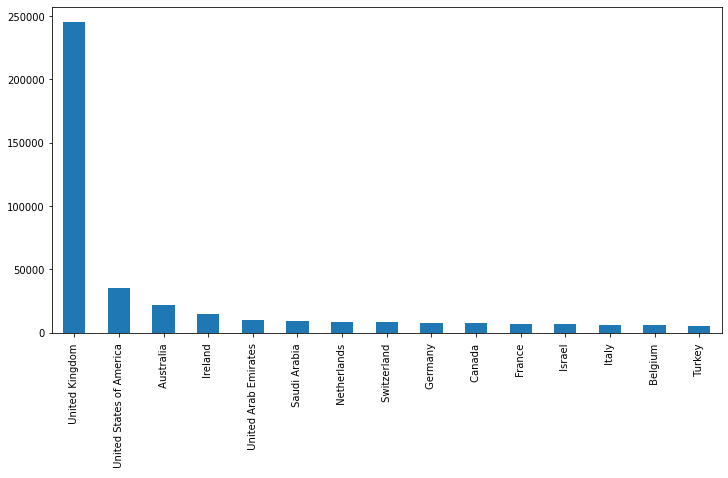

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set width to 12 and height to 6
hotels_encoded['reviewer_nationality'].value_counts().head(15).plot(kind='bar')
plt.show()


In [24]:

import category_encoders as ce



# Initialize Binary Encoder
encoder = ce.BinaryEncoder(cols=['reviewer_nationality'])

# Fit and transform the DataFrame
df_encoded = encoder.fit_transform(hotels_encoded)

# Display the encoded DataFrame
df_encoded.head(3)

,hotel_address,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,...,review_month_September,review_weekday_Monday,review_weekday_Saturday,review_weekday_Sunday,review_weekday_Thursday,review_weekday_Tuesday,review_weekday_Wednesday,season_Spring,season_Summer,season_Winter
0,Via Senigallia 6 20161 Milan Italy,904,8.1,Hotel Da Vinci,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,8.6,Urban Lodge Hotel,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,8.3,Alexandra Barcelona A DoubleTree by Hilton,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
df_encoded['days_since_review']= df_encoded['days_since_review'].apply(lambda x: int(x.split()[0]))
df_encoded.head(3)

,hotel_address,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,...,review_month_September,review_weekday_Monday,review_weekday_Saturday,review_weekday_Sunday,review_weekday_Thursday,review_weekday_Tuesday,review_weekday_Wednesday,season_Spring,season_Summer,season_Winter
0,Via Senigallia 6 20161 Milan Italy,904,8.1,Hotel Da Vinci,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,8.6,Urban Lodge Hotel,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,8.3,Alexandra Barcelona A DoubleTree by Hilton,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
from textblob import TextBlob

In [27]:
from textblob import TextBlob

df_encoded['negative_polarity'] = df_encoded['negative_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_encoded['negative_subjectivity'] = df_encoded['negative_review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

df_encoded['positive_polarity'] = df_encoded['positive_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_encoded['positive_subjectivity'] = df_encoded['positive_review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [28]:
df_encoded.head(3)

,hotel_address,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,...,review_weekday_Thursday,review_weekday_Tuesday,review_weekday_Wednesday,season_Spring,season_Summer,season_Winter,negative_polarity,negative_subjectivity,positive_polarity,positive_subjectivity
0,Via Senigallia 6 20161 Milan Italy,904,8.1,Hotel Da Vinci,0,0,0,0,0,0,...,0,0,0,0,1,0,-0.05,0.35,0.461364,0.643939
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,8.6,Urban Lodge Hotel,0,0,0,0,0,0,...,0,0,0,0,0,1,0.00,0.00,-0.113636,0.545455
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,8.3,Alexandra Barcelona A DoubleTree by Hilton,0,0,0,0,0,0,...,1,0,0,0,0,0,0.00,0.00,0.600000,1.000000


In [29]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 48 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515431 non-null  object 
 1   additional_number_of_scoring                515431 non-null  int64  
 2   average_score                               515431 non-null  float64
 3   hotel_name                                  515431 non-null  object 
 4   reviewer_nationality_0                      515431 non-null  int64  
 5   reviewer_nationality_1                      515431 non-null  int64  
 6   reviewer_nationality_2                      515431 non-null  int64  
 7   reviewer_nationality_3                      515431 non-null  int64  
 8   reviewer_nationality_4                      515431 non-null  int64  
 9   reviewer_nationality_5                      515431 non-null  int64  
 

In [30]:
df_encoded.drop(['hotel_address', 'hotel_name', 'tags',
                'negative_review', 'positive_review'], axis=1, inplace=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515431 entries, 0 to 515430
Data columns (total 43 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515431 non-null  int64  
 1   average_score                               515431 non-null  float64
 2   reviewer_nationality_0                      515431 non-null  int64  
 3   reviewer_nationality_1                      515431 non-null  int64  
 4   reviewer_nationality_2                      515431 non-null  int64  
 5   reviewer_nationality_3                      515431 non-null  int64  
 6   reviewer_nationality_4                      515431 non-null  int64  
 7   reviewer_nationality_5                      515431 non-null  int64  
 8   reviewer_nationality_6                      515431 non-null  int64  
 9   reviewer_nationality_7                      515431 non-null  int64  
 

### Отбор признаков

In [31]:
num_cols=['total_number_of_reviews', 'review_total_negative_word_counts', 'review_total_positive_word_counts',
          'total_number_of_reviews_reviewer_has_given', 'lng', 
         'additional_number_of_scoring', 'days_since_review', 'negative_polarity', 'negative_subjectivity',
         'positive_polarity', 'positive_subjectivity'] 

cat_cols=df_encoded.drop(num_cols+['reviewer_score', 'sample'], axis=1).columns

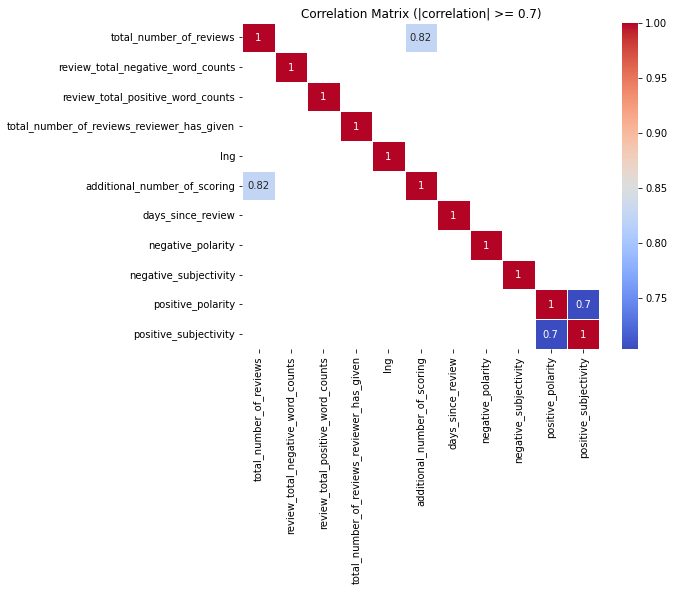

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_num=df_encoded[num_cols]
correlation_matrix = df_num.corr(method='pearson')
threshold = 0.7
filtered_corr_matrix = correlation_matrix[(correlation_matrix.abs() >= threshold)]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=filtered_corr_matrix.isnull())
plt.title("Correlation Matrix (|correlation| >= 0.7)")
plt.show()

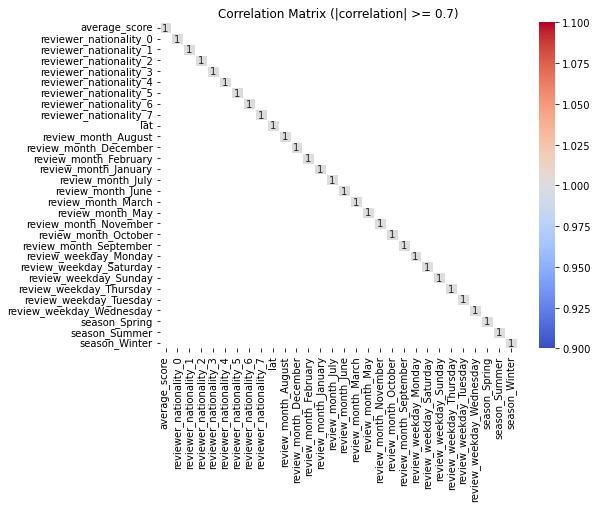

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_cat=df_encoded[cat_cols] 
correlation_matrix = df_cat.corr(method='spearman')
threshold = 0.7
filtered_corr_matrix = correlation_matrix[(correlation_matrix.abs() >= threshold)]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=filtered_corr_matrix.isnull())
plt.title("Correlation Matrix (|correlation| >= 0.7)")
plt.show()

In [34]:
# Теперь выделим тестовую часть
train_data = df_encoded.query('sample == 1').drop(['sample'], axis=1)
test_data = df_encoded.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [35]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [36]:
display('- Данные о пропусках в %')
missing_procent = round(X_train.isnull().sum() / len(X_train) * 100)
display(missing_procent)

'- Данные о пропусках в %'

additional_number_of_scoring                  0.0
average_score                                 0.0
reviewer_nationality_0                        0.0
reviewer_nationality_1                        0.0
reviewer_nationality_2                        0.0
reviewer_nationality_3                        0.0
reviewer_nationality_4                        0.0
reviewer_nationality_5                        0.0
reviewer_nationality_6                        0.0
reviewer_nationality_7                        0.0
review_total_negative_word_counts             0.0
total_number_of_reviews                       0.0
review_total_positive_word_counts             0.0
total_number_of_reviews_reviewer_has_given    0.0
days_since_review                             0.0
lat                                           0.0
lng                                           0.0
review_month_August                           0.0
review_month_December                         0.0
review_month_February                         0.0


In [37]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 42), (386496, 42), (386496, 41), (309196, 41), (77300, 41))

In [38]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [39]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [40]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished


In [41]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.8921714790242096


In [42]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

print('MAPE:', MAPE(y_test, y_pred))

MAPE: 12.820209926999693


<AxesSubplot:>

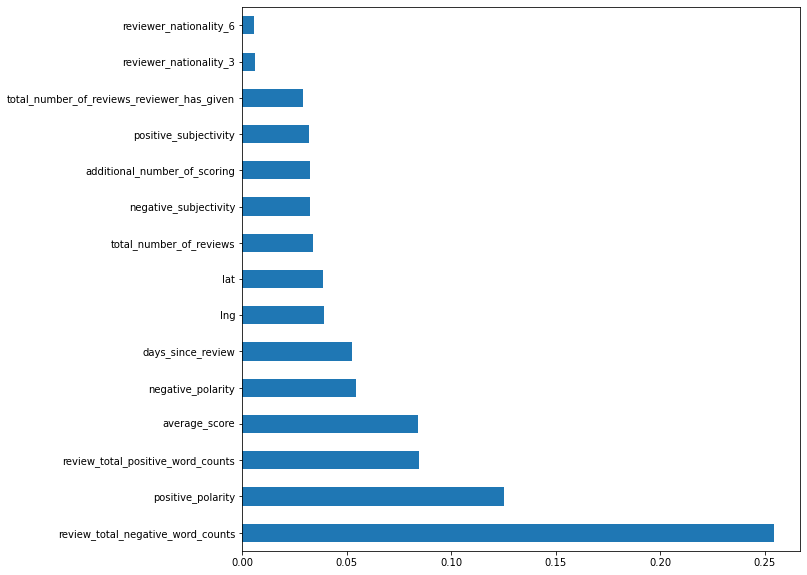

In [43]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели

plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [44]:
test_data.sample(10)

,additional_number_of_scoring,average_score,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7,...,review_weekday_Thursday,review_weekday_Tuesday,review_weekday_Wednesday,season_Spring,season_Summer,season_Winter,negative_polarity,negative_subjectivity,positive_polarity,positive_subjectivity
64909,1258,9.4,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0.150000,0.400000,0.400000,0.900000
119607,634,7.9,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,-0.225000,0.500000,0.500000,0.760000
1825,40,9.3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.000000,0.000000,0.391667,0.613889
81890,125,8.6,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0.600000,1.000000,0.650000,0.800000
36968,34,7.5,0,1,1,1,0,0,0,1,...,0,1,0,0,0,0,-0.005714,0.503214,0.600000,1.000000
122011,69,8.6,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,-0.250000,0.400000,0.910000,0.780000
112248,326,8.6,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,-0.441667,0.666667,0.431250,0.700000
63172,256,8.8,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0.150000,0.400000,0.265000,0.495000
100280,1471,9.1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0.000000,0.000000,-0.113636,0.545455
67336,1258,9.4,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,-0.500000,1.000000,0.700000,0.700000


In [45]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [46]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [47]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.4s finished


In [48]:
predict_submission

array([8.505, 7.044, 8.629, ..., 8.651, 9.515, 7.109])

In [49]:
list(sample_submission)

['reviewer_score', 'id']

In [50]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.505,488440
1,7.044,274649
2,8.629,374688
3,9.730,404352
4,9.747,451596
5,8.858,302161
6,8.570,317079
7,7.972,13963
8,8.911,159785
9,8.192,195089
